# 讀入套件

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# 資料前處理

In [6]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

170500096/170498071 [==============================] - 345s 2us/step


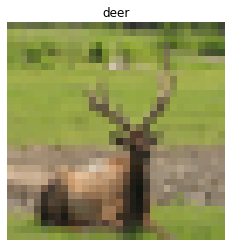

In [8]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

# 建立模型

filter改為 10, 30, 50
全連接層的神經元改為128

In [9]:
CNN_layers = [Conv2D(10, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(30, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(50, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [10]:
model = Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 10)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 30)        2730      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 50)          13550     
_________________________________________________________________
global_average_pooling2d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

# 訓練模型
batch_size改為70, epochese改為5

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

In [13]:
model.fit(X_train, y_train, 
          batch_size=70, 
          epochs=5,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 45s 898us/sample - loss: 1.8780 - categorical_accuracy: 0.2858 - val_loss: 1.6978 - val_categorical_accuracy: 0.3715
Epoch 2/5
50000/50000 [==============================] - 42s 845us/sample - loss: 1.6455 - categorical_accuracy: 0.3855 - val_loss: 1.5660 - val_categorical_accuracy: 0.4217
Epoch 3/5
50000/50000 [==============================] - 40s 807us/sample - loss: 1.5526 - categorical_accuracy: 0.4238 - val_loss: 1.4714 - val_categorical_accuracy: 0.4558
Epoch 4/5
50000/50000 [==============================] - 41s 820us/sample - loss: 1.4761 - categorical_accuracy: 0.4553 - val_loss: 1.4042 - val_categorical_accuracy: 0.4874
Epoch 5/5
50000/50000 [==============================] - 41s 821us/sample - loss: 1.3956 - categorical_accuracy: 0.4865 - val_loss: 1.3717 - val_categorical_accuracy: 0.4980


# 模型預測

In [14]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Accuracy: 49.34200048446655
Test Accuracy: 49.799999594688416


# 另一個資料集

In [15]:
# 導入cifar100的資料
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# 標準化
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

169009152/169001437 [==============================] - 285s 2us/step


神經元改為 75, 150 , 225

In [16]:
FC_layers_CF100 = [Dense(units=75, activation='relu'),
                   Dense(units=150, activation='relu'),
                   Dense(units=225, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [24]:
model_new = Sequential(CNN_layers+FC_layers_CF100)
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 10)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 30)        2730      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 50)          13550     
_________________________________________________________________
global_average_pooling2d (Gl (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)               

In [25]:
for layer in CNN_layers:
    layer.trainable = False

In [26]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 10)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 30)        2730      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 50)          13550     
_________________________________________________________________
global_average_pooling2d (Gl (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)               

In [27]:
model_new.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

model_new.fit(U_train, v_train,
                batch_size=100, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 24s 478us/sample - loss: 3.2348 - categorical_accuracy: 0.2126 - val_loss: 3.2533 - val_categorical_accuracy: 0.2150
Epoch 2/5
50000/50000 [==============================] - 16s 311us/sample - loss: 3.1890 - categorical_accuracy: 0.2229 - val_loss: 3.2356 - val_categorical_accuracy: 0.2190
Epoch 3/5
50000/50000 [==============================] - 16s 311us/sample - loss: 3.1512 - categorical_accuracy: 0.2289 - val_loss: 3.1823 - val_categorical_accuracy: 0.2264
Epoch 4/5
50000/50000 [==============================] - 16s 313us/sample - loss: 3.1199 - categorical_accuracy: 0.2327 - val_loss: 3.1809 - val_categorical_accuracy: 0.2261
Epoch 5/5
50000/50000 [==============================] - 17s 338us/sample - loss: 3.0864 - categorical_accuracy: 0.2387 - val_loss: 3.1492 - val_categorical_accuracy: 0.2366


In [28]:
score_train = model_new.evaluate(U_train, v_train)
score_test = model_new.evaluate(U_test, v_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Accuracy: 24.886000156402588
Test Accuracy: 23.659999668598175
